In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data=pd.read_csv("credit_risk.csv")

In [3]:
df=data.dropna()

In [4]:
df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [5]:
len(data)

614

In [6]:
data.index

RangeIndex(start=0, stop=614, step=1)

In [7]:
print(len(data),"before delete")
print(len(df),'after delete')

614 before delete
480 after delete


In [8]:
len(data)-len(df)

134

# Exploratory Data Analysis

In [9]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [10]:
df.groupby(["Education","Loan_Status"])["Loan_Status"].count()\
    /df.groupby(["Education"])["Loan_Status"].count()

Education     Loan_Status
Graduate      N              0.292428
              Y              0.707572
Not Graduate  N              0.371134
              Y              0.628866
Name: Loan_Status, dtype: float64

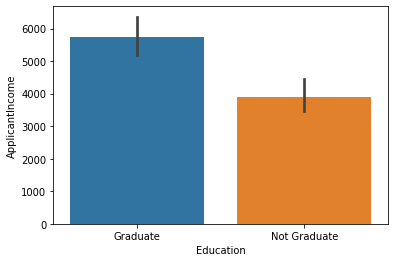

In [11]:
sns.barplot(x="Education",y='ApplicantIncome',data=df)

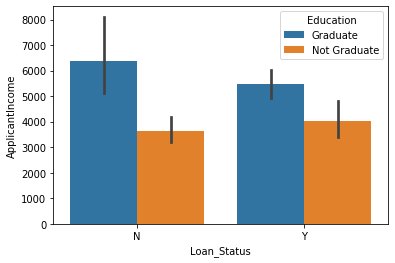

In [12]:
sns.barplot(x="Loan_Status",y='ApplicantIncome',hue='Education',data=df)

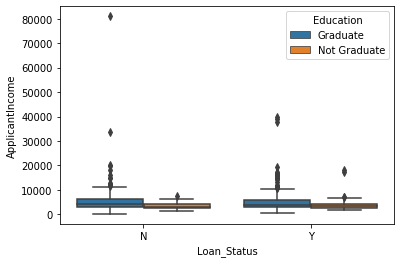

In [13]:
sns.boxplot(x="Loan_Status" , y="ApplicantIncome" ,hue='Education', data = df)

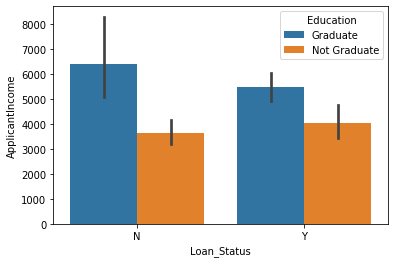

In [14]:
sns.barplot(x="Loan_Status",y='ApplicantIncome',hue='Education',data=df)

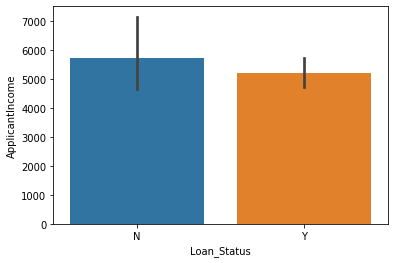

In [15]:
sns.barplot(x="Loan_Status",y='ApplicantIncome',data=df)

In [16]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

# Data Cleaning

In [17]:
def data_cleaning(d):
    d=d.copy()
    y=d['Loan_Status'].map(lambda x: 1 if x=="Y" else 0)
    d=d[[ 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area']]
    d.Gender=d.Gender.map(lambda x: 1 if x=="Male" else 0)
    d.Married=d.Married.map(lambda x:1 if x=="Yes" else 0)
    d.Dependents=d.Dependents.map(lambda x: 3 if str(x)=="3+" else int(x))
    d.Education=d.Education.map(lambda x: 1 if x=="Graduate" else 0)
    d.Self_Employed=d.Self_Employed.map(lambda x: 1 if x=="Yes" else 0)
    d=d.join(pd.get_dummies(d.Property_Area)).drop(['Property_Area'],axis=1)
    return d,y
    

In [18]:
X,y=data_cleaning(df)


In [19]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X,y)
print("accuracy",lr.score(X,y))

accuracy 0.8125


C:\Users\rohan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [20]:
for col,m in zip(X.columns,lr.coef_[0]):
    print(col,"*",m,"+")
print(lr.intercept_[0])

Gender * 0.18953193258605866 +
Married * 0.3979368514791427 +
Dependents * 0.053233820321660304 +
Education * 0.31208639815838807 +
Self_Employed * -0.1258894940455408 +
ApplicantIncome * -1.586354494522131e-06 +
CoapplicantIncome * -4.730911709951797e-05 +
LoanAmount * -0.002890173833730842 +
Loan_Amount_Term * -0.004263074920122958 +
Credit_History * 2.7640230263051118 +
Rural * -0.27275271442441756 +
Semiurban * 0.4070272158175193 +
Urban * -0.2685866030343092 +
-0.13431210164120716


Z=Gender * 0.1895319923476763 +
Married * 0.3979369153057798 +
Dependents * 0.0532337759221262 +
Education * 0.31208643672594927 +
Self_Employed * -0.12588948456551205 +
ApplicantIncome * -1.5863537024274261e-06 +
CoapplicantIncome * -4.730911938653908e-05 +
LoanAmount * -0.0028901740283690685 +
Loan_Amount_Term * -0.004263075254672131 +
Credit_History * 2.7640229863153793 +
Rural * -0.2727527559366654 +
Semiurban * 0.4070273166484802 +
Urban * -0.2685865887090895 +
-0.134312027997271

p=1/(1+e**-Z)

In [21]:
y_hat = lr.predict(X)

In [22]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [23]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y,y_hat,labels=[1,0]))

[[324   8]
 [ 82  66]]


In [24]:
from sklearn.metrics import classification_report
print(classification_report(y,y_hat,labels=[1,0]))

              precision    recall  f1-score   support

           1       0.80      0.98      0.88       332
           0       0.89      0.45      0.59       148

    accuracy                           0.81       480
   macro avg       0.84      0.71      0.74       480
weighted avg       0.83      0.81      0.79       480

